# LAP - Aufgabenserie 11

# Aufgabe 1 - Methode der kleinsten Quadrate (herkömmlich)
## Lineare Regression - Gefahrene Kilometer und Benzinverbrauch
Wir wollen nun eine lineare Regression mit Hilfe eines ML-Ansatzes durchführen. Wir suchen eine Gerade, welche die Datenpunkte möglichst gut abbildet. Die beiden Koeffizienten (Steigung und Achsenabschnitt) sollen jetzt durch ein künstliches, neuronales Netz (knN) bestimmt werden. Dafür benötigen wir Trainings- und Testdaten, an welchen das knN trainiert und getestet werden kann. Schliesslich wollen wir die Koeffizienten ausgeben und den Erfolg ausweisen.

### a) Generierung der Daten
Im ersten Schritt generieren wir uns diese Daten mit den folgenden Parametern: n = 600, Basisverbrauch = 6 Liter, Verbrauch pro km = 0.05 l. Es soll noch eine Unsicherheit (Rauschen) hinzugefügt werden. Dieses Rauschen kann durch `np.random.normal(0, 1, n)` realisiert werden. Unsere Datei soll die beiden Spalten: «kilometer» und «verbrauch» enthalten. Die Kilometer-Werte berechnen wir ebenfalls zufällig aus dem Intervall [100, 1000] mit einer Gleichverteilung.


In [19]:
import numpy as np
import pandas as pd


# Schritt 1 - Variableninhalte
n = 600
basisverbrauch = 6      # Achsenabschnitt / intercept
verbrauch_km = 0.05     # Steigung / slope
ausgabe_datei = 'Daten/daten-aus-11-1-verbrauch.csv'

# Schritt 2: Generiere die Daten
# a) Generiere zufällige Daten für gefahrene Kilometer (zwischen 100 und 1000 km)
kilometer = np.random.uniform(100, 1000, n)

# b) Generiere Benzinverbrauch in Litern basierend auf einer linearen Beziehung 
#    mit zufälligem Rauschen
verbrauch = basisverbrauch + verbrauch_km * kilometer
rauschen = np.random.normal(0, 1, n)
verbrauch = verbrauch + rauschen

# Schritt 3: Speichern der Daten
# a) DataFrame erstellen
daten = pd.DataFrame({
    'Kilometer': np.round(kilometer, 1),
    'Verbrauch': np.round(verbrauch, 2)
})

# b) Speichere die Daten in eine CSV-Datei
daten.to_csv(ausgabe_datei, index=False)

### b) Berechnung der Koeffizienten mit Hilfe der _Methode der kleinsten Quadrate_.


In [20]:
import scipy.stats as sci
import pandas as pd

# Eingabedaten einlesen
daten = pd.read_csv('Daten/daten-aus-11-1-verbrauch.csv')
X = daten['Kilometer']
Y = daten['Verbrauch']

# Berechnung der Regressionsparameter
m, a, r, p, e = sci.linregress(X, Y)
# m: Steigung
# a: Achsenabschnitt
# r: Korrelationskoeffizient
# p: p-Wert
# e: Standardfehler

# Prognose für x = 120 km
x_prognose = 120
y_prognose = m * x_prognose + a

print(f"Prognostizierter Wert für gefahrene km={x_prognose}: Verbrauch={y_prognose:.2f}")

Prognostizierter Wert für gefahrene km=120: Verbrauch=12.04


# Aufgabe 2 - ML - Überwachtes Lernen
## Lineare Regression - Gefahrene Kilometer und Benzinverbrauch
Wir wollen nun eine lineare Regression mit Hilfe eines ML-Ansatzes durchführen. Wir suchen eine Gerade, welche die Datenpunkte möglichst gut abbildet. Die beiden Koeffizienten (Steigung und Achsenabschnitt) sollen jetzt durch ein künstliches, neuronales Netz (knN) bestimmt werden. Dafür benötigen wir Trainings- und Testdaten, an welchen das knN trainiert und getestet werden kann. Schliesslich wollen wir die Koeffizienten ausgeben und den Erfolg ausweisen.

### a) Generierung der Daten
Im ersten Schritt generieren wir uns diese Daten mit den folgenden Parametern: n = 600, Basisverbrauch = 6 Liter, Verbrauch pro km = 0.05 l. Es soll noch eine Unsicherheit (Rauschen) hinzugefügt werden. Dieses Rauschen kann durch `np.random.normal(0, 1, n)` realisiert werden. Unsere Datei soll die beiden Spalten: «kilometer» und «verbrauch» enthalten. Die Kilometer-Werte berechnen wir ebenfalls zufällig aus dem Intervall [100, 1000] mit einer Gleichverteilung.


In [21]:
import numpy as np
import pandas as pd


# Schritt 1 - Variableninhalte
n = 600
basisverbrauch = 6      # Achsenabschnitt / intercept
verbrauch_km = 0.05     # Steigung / slope
ausgabe_datei = 'Daten/daten-aus-11-1-verbrauch.csv'

# Schritt 2: Generiere die Daten
# a) Generiere zufällige Daten für gefahrene Kilometer (zwischen 100 und 1000 km)
kilometer = np.random.uniform(100, 1000, n)

# b) Generiere Benzinverbrauch in Litern basierend auf einer linearen Beziehung 
#    mit zufälligem Rauschen
verbrauch = basisverbrauch + verbrauch_km * kilometer
rauschen = np.random.normal(0, 1, n)
verbrauch = verbrauch + rauschen

# Schritt 3: Speichern der Daten
# a) DataFrame erstellen
daten = pd.DataFrame({
    'Kilometer': np.round(kilometer, 1),
    'Verbrauch': np.round(verbrauch, 2)
})

# b) Speichere die Daten in eine CSV-Datei
daten.to_csv(ausgabe_datei, index=False)

### b) Berechnung der Koeffizienten mit Hilfe des ML-Modells
Jetzt nehmen wir ein universell einsetzbares Machine-Learning-Gerüst als Lösungsmöglichkeit zur Hilfe. Dieses Modellgerüst wird aus der Bibliothek [sklearn](https://scikit-learn.org/stable/index.html) eingesetzt, welches durch den Befehl _pip install scikit-learn_ im Terminal installiert respektive heruntergeladen werden muss.

Um den Erfolg unseres trainierten, künstlichen neuronalen Netzes ausweisen zu können, verwenden wir den Befehl `modell.score(x,y)`, wobei (x; y) die Werte der Testdaten darstellen.

#### Schritt 1 - Importe und Laden der Daten
-   Das entsprechende Modell kann jetzt durch den Befehl `from sklearn.linear_model import LinearRegression` importiert werden.
-   Damit wir die Daten automatisiert in Trainings- und Testdaten aufteilen können, importieren wir den Befehl `from sklearn.model_selection import train_test_split`.
-   Die Bibliothek [pandas](https://pandas.pydata.org/docs/) verwenden wir für das Lesen und speichern der Daten.
-   Für die Visualisierung verwenden wir, wie üblich, die Bibliothek [matplotlib](https://matplotlib.org).

In [22]:
# Schritt 1: Importe und laden der Daten
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

datei_name_ein = 'Daten/daten-aus-11-1-verbrauch.csv'
daten = pd.read_csv(datei_name_ein)

#### Schritt 2 - Daten in Trainings- und Testdaten aufteilen
Der Anteil der Trainingsdaten wird auf (1 - 0.3) 0.7 und somit der Testdaten auf 0.3 festgelegt. Durch die Angabe von _random_state = 42_, erhalten wir reproduzierbare Resultate. Siehe dazu auch etwa [Machine learning - kurz & gut, ISBN 978-3-96009-236-0](https://www.exlibris.ch/de/buecher-buch/e-books-deutsch/oliver-zeigermann/machine-learning-kurz-amp-gut/id/9783960108566/), Seite 121.


In [23]:
# Schritt 2: Aufteilen in Trainings- und Testdaten
X = daten[['Kilometer']].values
y = daten['Verbrauch'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Die doppelten Klammern in der Zeile X = data[['Kilometer']].values sind notwendig, um 
# sicherzustellen, dass X eine 2D-Array (Matrix) bleibt, während y = data['Verbrauch'].values 
# ein 1D-Array (Vektor) ist. Scikit-Learn erwartet, dass X eine 2D-Struktur hat, selbst wenn 
# es nur eine einzelne Eingabevariable gibt.

#### Schritt 3 - Modell trainieren

In [24]:
# Schritt 3: Machine-Learning-Ansatz: Lineare Regression
modell = LinearRegression()
modell.fit(X_train, y_train)

LinearRegression()

#### Schritt 4 - Vorhersage / Prognose / Ausgabe
Berechnung der Koeffizienten der Regressionsgeraden.

In [25]:
y_prognose = modell.predict(X_test)

# Schritt 4: Berechnung der Koeffizienten und den Erfolg
print("Machine-Learning-Koeffizienten:")
print(f"Intercept/Achsenabschnitt = {modell.intercept_:.4f}, Slope/Steigung = {modell.coef_[0]:.4f}")
# a) f vor dem String: Kennzeichnet den String als f-String.
# b) {modell.intercept_:.4f}: Bindet den Wert der Variablen modell.intercept_ 
#    ein und formatiert ihn so, dass er 4 Dezimalstellen anzeigt.
print(f"Erfolg = {modell.score(X_test, y_test):.4f}")

# Effektive Prognose für 120 km
x_prognose = 120
y_prognose = modell.predict([[x_prognose]])
print(f"Prognostizierter Wert für x={x_prognose}: y={y_prognose[0]:.2f}")


Machine-Learning-Koeffizienten:
Intercept/Achsenabschnitt = 6.0389, Slope/Steigung = 0.0500
Erfolg = 0.9954
Prognostizierter Wert für x=120: y=12.04


Wenn wir diese Resultate mit den Vorgaben vergleichen, stellen wir bei den Koeffizienten folgendes fest:
-   Achsenabschnitt (intercept, `basisverbrauch`): Vorgabe: 6
-   Steigung (slope, `verbrauch_km`): Vorgabe: 0.05

#### Schritt 5 - Visualisierung

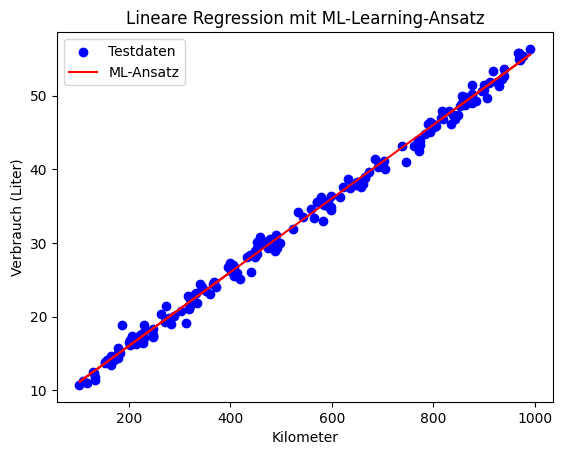

In [26]:
# Schritt 5: Plotten der Ergebnisse
plt.scatter(X_test, y_test, color='blue', label='Testdaten')
plt.plot(X_test, modell.predict(X_test), color='red', label='ML-Ansatz')
plt.xlabel('Kilometer')
plt.ylabel('Verbrauch (Liter)')
plt.title('Lineare Regression mit ML-Learning-Ansatz')
plt.legend()
plt.show()